In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

In [3]:

transform=transforms.Compose([
    transforms.ToTensor(), #0->255 ==> [0,1)
    transforms.Normalize((0.5,), (0.5,)) #[0,1) ==> [-1,1]
])


train_data=datasets.MNIST(
    root='handwrittenDigitData',
    train=True,
    transform=transform,
    download=True
)
test_data=datasets.MNIST(
    root='handwrittenDigitData',
    train=False,
    transform=transform,
    download=True
)

In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:

test_dataloader=DataLoader(test_data,batch_size=64,shuffle=True)
train_dataloader=DataLoader(train_data,batch_size=64,shuffle=True)
data_iter=iter(train_dataloader)
image,label=next(data_iter)

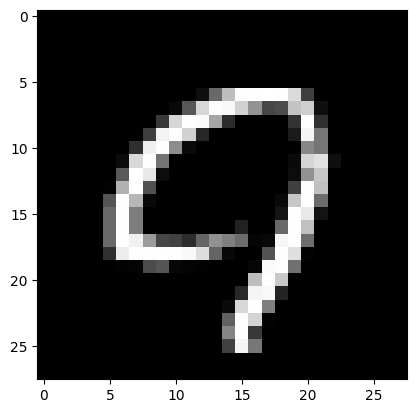

9


In [6]:
plt.imshow(image[0].squeeze(), cmap='gray')
plt.figsize=(2,2)
plt.show()
title=label[0].item()
print(title)

In [7]:
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    
    def forward(self,x):
        return self.network(x)

In [8]:
model=DigitsClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

In [9]:
running_loss=0.0
epochs=5
for epoch in range(epochs):
    for images,labels in train_dataloader:

        # Forward pass

        outputs=model(images)
        loss=criterion(outputs,labels)

        running_loss+=loss.item()

        # Backward pass and optimization

        optimizer.zero_grad() 
        loss.backward()

        #weight update

        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_dataloader)}")
    

Epoch 1/5, Loss: 0.3972097228664452
Epoch 2/5, Loss: 0.5884528937441772
Epoch 3/5, Loss: 0.7281707832013874
Epoch 4/5, Loss: 0.8404509344471813
Epoch 5/5, Loss: 0.9376688848486913


In [10]:
model.eval()

with torch.no_grad():
    correct=0
    total=0
    for images,labels in test_dataloader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    
    print(f"Test Accuracy: {100*correct/total}%")

Test Accuracy: 96.79%


In [11]:
model.eval()

with torch.no_grad():
    correct=0
    total=0
    for images,labels in train_dataloader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    
    print(f"Train Accuracy: {100*correct/total}%")

Train Accuracy: 97.73166666666667%


In [12]:
model.eval()
all_predictions=[]
all_labels=[]
with torch.no_grad():
    for images,labels in test_dataloader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        #append labels and predictions to lists
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [13]:
len(all_predictions),len(all_labels)


(10000, 10000)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
report=classification_report(all_labels,all_predictions)
cm=confusion_matrix(all_labels,all_predictions)
print(report)
print(cm)


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 973    0    1    0    0    0    1    1    2    2]
 [   0 1116    1    5    0    2    3    2    4    2]
 [   8    0 1003    5    2    0    4    6    4    0]
 [   0    1    7  974    0   16    1    7    2    2]
 [   1    0    6    0  943   

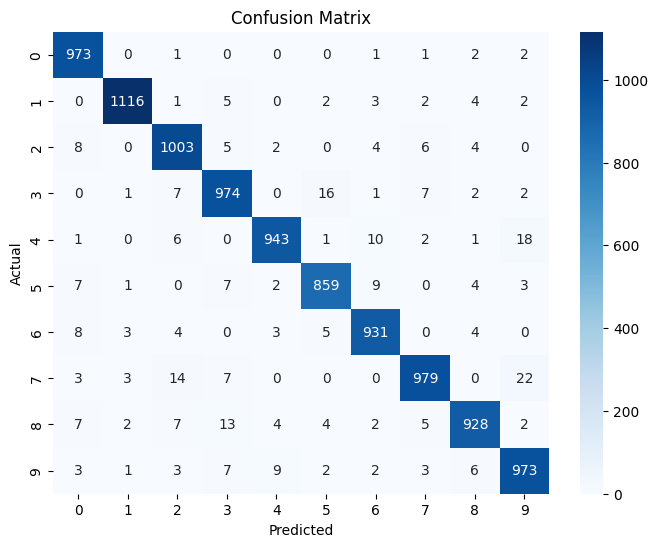

In [15]:
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
